In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>Primorials_15.h</h1>
Set header file with the first fifteen primorials capable of being held in standard memory word(s).

In [ ]:
%%writefile /content/drive/MyDrive/Desktop/Studies/Publishing/WebsiteDev/TomDotCom/Pages/Blog/Primorials_15.h
#include <stdint.h>

#ifndef PRIMORIALS_15_H
#define PRIMORIALS_15_H

const uint64_t P0  = 1;                        //1
const uint64_t P1  = 2;                        //1*2
const uint64_t P2  = 6;                        //1*2*3
const uint64_t P3  = 30;                       //1*2*3*5
const uint64_t P4  = 210;                      //1*2*3*5*7
const uint64_t P5  = 2310;                     //1*2*3*5*7*11
const uint64_t P6  = 30030;                    //1*2*3*5*7*11*13
const uint64_t P7  = 510510;                   //1*2*3*5*7*11*13*17
const uint64_t P8  = 9699690;                  //1*2*3*5*7*11*13*17*19
const uint64_t P9  = 223092870;                //1*2*3*5*7*11*13*17*19*23
const uint64_t P10 = 6469693230;               //1*2*3*5*7*11*13*17*19*23*29
const uint64_t P11 = 200560490130;             //1*2*3*5*7*11*13*17*19*23*29*31
const uint64_t P12 = 7420738134810;            //1*2*3*5*7*11*13*17*19*23*29*31*37
const uint64_t P13 = 304250263527210;          //1*2*3*5*7*11*13*17*19*23*29*31*37*41
const uint64_t P14 = 13082761331670030;        //1*2*3*5*7*11*13*17*19*23*29*31*37*41*43
const uint64_t P15 = 614889782588491410;       //1*2*3*5*7*11*13*17*19*23*29*31*37*41*43*47

const int P0_LOG2  = 0;  //floor(log2(P0))
const int P1_LOG2  = 1;  //floor(log2(P1))...
const int P2_LOG2  = 2;  //...
const int P3_LOG2  = 4;
const int P4_LOG2  = 7;
const int P5_LOG2  = 11;
const int P6_LOG2  = 14;
const int P7_LOG2  = 18;
const int P8_LOG2  = 23;
const int P9_LOG2  = 27;
const int P10_LOG2 = 32;
const int P11_LOG2 = 37;
const int P12_LOG2 = 42;
const int P13_LOG2 = 48;
const int P14_LOG2 = 53;
const int P15_LOG2 = 59;

#endif

Overwriting /content/drive/MyDrive/Desktop/Studies/Publishing/WebsiteDev/TomDotCom/Pages/Blog/Primorials_15.h


In [10]:
%%writefile /content/drive/MyDrive/Desktop/Studies/Publishing/WebsiteDev/TomDotCom/Pages/Blog/primeFactorization.c
#include <stdio.h>
#include <stdlib.h>
#include <stdint.h>
#include <inttypes.h>
#include <stdbool.h>
#include <time.h>
#include <math.h>
#include "Primorials_15.h"

#define MAX_RANDOM_NUMBER 0x7fffffff
#define UNSIGNINT64_MAX 0x7fffffffffffffff

int main(){
  // DECLARATIONS:
  bool heads = false;
  bool isEven = false;
  uint64_t n = 0;

  // Seed rand with current time
  srand(time(NULL));
  // Generate random number
  double randomRemainder = rand()/(double)RAND_MAX;
  printf("%f\n", randomRemainder);
  if (randomRemainder > 0.5){
    heads = true;
  }
  n = (randomRemainder*(UNSIGNINT64_MAX));
  if (heads) {
    n += 1;
  }
  printf("%" PRIu64 "\n", n);

  // Even?
  short lsb = n & 0x1;
  if (lsb == 0){
    isEven = true;
  }
  if (isEven){
    printf("Even\n");
    return 0;
  } else {
    printf("Odd\n");
  }

  //Big?
  short msb = 0;
  bool isBig = false;
  for (int i = 0; i < 10; i++){
    msb = n >> 63 - i;
    if (msb == 1){
      isBig = true;
      printf("Big\n");;
    }
  }
  if (!isBig){
    printf("Small\n");
  }

  //Primorial?
  bool isPrimorial = false;
  uint64_t primArray[16];
  primArray[0] = P0;
  primArray[1] = P1;
  primArray[2] = P2;
  primArray[3] = P3;
  primArray[4] = P4;
  primArray[5] = P5;
  primArray[6] = P6;
  primArray[7] = P7;
  primArray[8] = P8;
  primArray[9] = P9;
  primArray[10] = P10;
  primArray[11] = P11;
  primArray[12] = P12;
  primArray[13] = P13;
  primArray[14] = P14;
  primArray[15] = P15;

  int pLimit = 0;
  //printf("The largest primorial in this program is P15, or %" PRIu64 ".\n",primArray[15]);

  if (isBig) {
    for (int i = 14; i < 16; i++){
      if (n == primArray[i]){
        isPrimorial = true;
        printf("Big Primorial\n");
      } else {
        if (n < primArray[i]){
          pLimit = i;
          printf("Less than P%d , greater than P%d.\n", i, i-1);
        } else if (i == 15) {
          pLimit = 16;
          printf("Less than P16, Greater than P15.\n");
        }
      }
    }
  } else {
    for (int i = 0; i < 13; i++){
      if (n == primArray[i]){
        isPrimorial = true;
        printf("Small Primorial\n");
      } else {
        if (n < primArray[i]){
          pLimit = i;
          printf("Less than P%d , greater than P%d.\n", i, i-1);
          break;
        } else if (i == 12) {
          pLimit = 13;
          printf("Less than P13, Greater than P12.\n");
          break;
        }
      }
    }
  }

  //Maximum number of possible factors?
  int twoArray[16];
  twoArray[0] = P0_LOG2;
  twoArray[1] = P1_LOG2;
  twoArray[2] = P2_LOG2;
  twoArray[3] = P3_LOG2;
  twoArray[4] = P4_LOG2;
  twoArray[5] = P5_LOG2;
  twoArray[6] = P6_LOG2;
  twoArray[7] = P7_LOG2;
  twoArray[8] = P8_LOG2;
  twoArray[9] = P9_LOG2;
  twoArray[10] = P10_LOG2;
  twoArray[11] = P11_LOG2;
  twoArray[12] = P12_LOG2;
  twoArray[13] = P13_LOG2;
  twoArray[14] = P14_LOG2;
  twoArray[15] = P15_LOG2;


  bool tooBig = false;
  int maxFactors = 0;
  if (pLimit < 16){
    maxFactors = twoArray[pLimit];
  } else {
    tooBig = true;
    maxFactors = twoArray[15];
  }

  printf("\n\nMaximum number of factors is %d.\n\n", maxFactors);

  //Check for two factors:
  //n ~ p*q
  //y^2 - yx - n = 0; y(y - x) = n --> if n has square root, y is 0;
  //for n = 7, x = 1 and y = 6;
  //for n = 10, {(9,10), (5,3)} --> {(10,1), (5,2)}
  //Getting into quadratic formula: y = x/2 + sqrt(x^2 - 4*(-n))/2
  // x - y = p, y = q
  double determinant;
  double decimal;
  uint64_t x = 0;
  uint64_t y = 0;
  uint64_t p = 1;
  uint64_t q = 1;
  uint64_t lowerBound = (uint64_t)floor((sqrt((double)n)))/2;
  uint64_t upperBound = (uint64_t)ceil(n/2);
  uint64_t testFactors = 0;
  for(uint64_t i = lowerBound; i < upperBound; i++){
    x = i;
    determinant = sqrt((double)(x*x) + 4*(double)n);
    decimal = determinant - (int)determinant;
    if (decimal == 0) {
      y = (uint64_t)(((double)x + determinant)/2);
      testFactors = y * (y - x);
      if(n == testFactors){
        p = y - x; //lesser factor
        q = y; //greater factor
        break;
    }
  }
  }
  printf("p is %ld and q is %ld .\n\n", p, q);





  return 0;
}

Overwriting /content/drive/MyDrive/Desktop/Studies/Publishing/WebsiteDev/TomDotCom/Pages/Blog/primeFactorization.c


In [11]:
%cd /content/drive/MyDrive/Desktop/Studies/Publishing/WebsiteDev/TomDotCom/Pages/Blog/

!gcc -o factorPrimes primeFactorization.c -lm

/content/drive/MyDrive/Desktop/Studies/Publishing/WebsiteDev/TomDotCom/Pages/Blog


In [ ]:
%%script ./factorPrimes

In [ ]:
%%writefile /content/drive/MyDrive/Desktop/Studies/Publishing/WebsiteDev/TomDotCom/Pages/Blog/quadCheck.c

#include <stdio.h>
#include <stdlib.h>
#include <stdint.h>
#include <inttypes.h>
#include <math.h>

int main(){
//Test:

  //Check for two factors:
  //n ~ p*q
  //y^2 - yx - n = 0; y(y - x) = n --> if n has square root, y is 0;
  //for n = 7, x = 1 and y = 6;
  //for n = 10, {(9,10), (5,3)} --> {(10,1), (5,2)}
  //Getting into quadratic formula: y = x/2 + sqrt(x^2 - 4*(-n))/2
  // x - y = p, y = q
  uint64_t n = 105;
  uint64_t x = 0;
  uint64_t y = 0;
  uint64_t p = 1;
  uint64_t q = 1;
  uint64_t lowerBound = (uint64_t)floor((sqrt((double)n)))/2;
  uint64_t upperBound = (uint64_t)ceil(n/2);
  uint64_t testFactors = 0;
  for(uint64_t i = lowerBound; i < upperBound; i++){
    x = i;
    y = (uint64_t)(((double)x + (sqrt((double)(x*x) + 4*((double)n))))/2);
    if (x == 16){
      printf("x is %ld and y is %ld .\n\n", x, y);
    }
    testFactors = y * (y - x);
    if(n == testFactors){
      p = y - x; //lesser factor
      q = y; //greater factor
      break;
    }
  }

  printf("p is %ld and q is %ld .\n\n", p, q);
  printf("test factor: x %ld , y %ld , testFactors %ld ", x , y , testFactors );
  return 0;
}

Overwriting /content/drive/MyDrive/Desktop/Studies/Publishing/WebsiteDev/TomDotCom/Pages/Blog/quadCheck.c


In [ ]:
%cd /content/drive/MyDrive/Desktop/Studies/Publishing/WebsiteDev/TomDotCom/Pages/Blog/

!gcc -o quadCheck quadCheck.c -lm

/content/drive/MyDrive/Desktop/Studies/Publishing/WebsiteDev/TomDotCom/Pages/Blog


In [ ]:
%%script ./quadCheck

p is 7 and q is 15 .

test factor: x 8 , y 15 , testFactors 105 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

m = random.randint(1,1000)
print(m)

x = np.array(range(m))
y = np.zeros(m)
for i in range(m):
  y[i] = m % (i + 1);
print(y)

plt.scatter(x, y)
plt.title(m)
plt.show()


Largest possible factor always n/2 or less?

Percentage of factors in the range sqrt(n): 49.96%


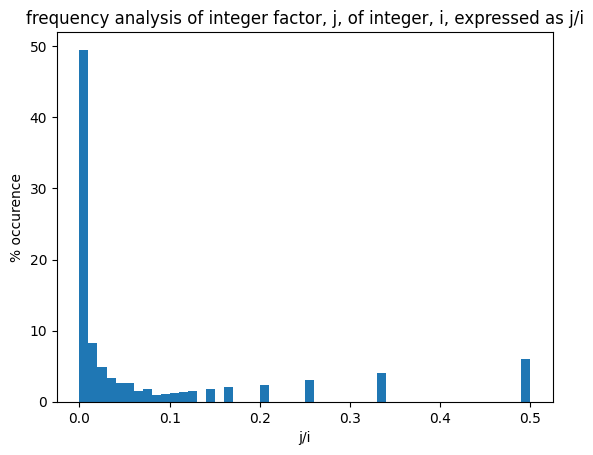

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

z=np.array([0])
r = 25000
hypothesis = 0

for i in range(r):
  i+=2
  for j in range(i):
    j +=2
    if (i % j == 0 and i != j):
      z = np.append(z, j/i)
      if (j < np.sqrt(i)):
        hypothesis += 1

# count_in_range = np.sum((z>0) & (z <= 1 / (n^(1/2)))  # Count factors within the range
percentage = (hypothesis / len(z)) * 100

print(f"Percentage of factors in the range sqrt(n): {percentage:.2f}%")

weights = np.ones_like(z)/float(len(z))

plt.hist(z, (int(r/500)), weights=weights, density=True)
plt.xlabel("j/i")
plt.ylabel("% occurence")
plt.title("frequency analysis of integer factor, j, of integer, i, expressed as j/i")
plt.show()


Can I define the test range for factorization as a finite set for any integer, n?  The above shows a 1/x distrubtion up until a certain limit, at which point the distribution becomes linear.  This limiting value appears to be i/(2<sup>3</sup>)?

Composite number: 840, Prime number: 839


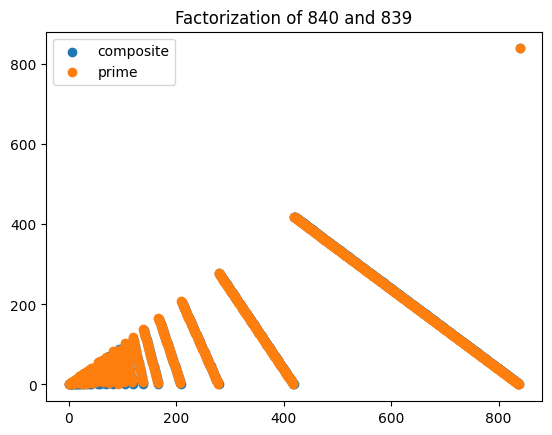

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

testComposite = 840
testPrime = 839
print(f"Composite number: {testComposite}, Prime number: {testPrime}")

compositeResidues = np.array(range(testComposite))
primeResidues = np.array(range(testComposite))
nums = np.array(range(testComposite))

for i in range(testComposite - 1):
  compositeResidues[i] = testComposite % (i + 1)
  primeResidues[i] = testPrime % (i + 1)

plt.scatter(nums, compositeResidues, label="composite")
plt.scatter(nums, primeResidues, label="prime")
plt.title(f"Factorization of {testComposite} and {testPrime}")
plt.legend()
plt.show()
